In [36]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency, zscore
import matplotlib.pyplot as plt
import seaborn as sns
import os

# os.chdir("D:/Algorithmic-Fairness-Interpretability/afi_final_project")

In [75]:
df = pd.read_csv("predictions_output_gradient_boosting.csv")

In [76]:
df.head(20)

,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Predicted_PD,True_Label,Group
0,2,22,8900,8900,0,60,0.084828,0,0,0,0.288995,1,0
1,0,55,10400,9400,0,72,0.083889,0,0,0,0.356267,0,0
2,1,40,15990,14990,0,60,0.127142,0,1,0,0.225532,1,0
3,5,43,19999,23233,0,72,0.153289,0,0,0,0.441289,0,0
4,1,26,11800,4298,1,24,0.115528,0,0,0,0.085153,0,0
5,3,21,10090,11948,0,60,0.138462,0,0,0,0.543268,0,0
6,14,52,9400,9400,0,24,0.080952,0,0,1,0.096134,0,0
7,4,58,11504,12041,0,36,0.088750,0,1,1,0.079153,0,0
8,5,58,20660,22237,0,60,0.162222,0,1,1,0.159206,0,0
9,0,20,22990,25703,0,96,0.273636,0,0,1,0.545295,1,0


---
---
---

In [103]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Use the entire dataset
# # df = pd.read_csv('your_dataset.csv')  # Load your dataset

# # For demonstration, let's assume 'Married' is the protected attribute
# protected_attribute = 'Married'
# target = 'True_Label'

# # List of continuous features to bin
# continuous_features = ['Job tenure', 'Car price', 'Funding amount', 'Down payment', 'Loan duration', 'Monthly payment', 'Age']

# # Number of bins
# num_bins = 4

# # Initialize figure for subplots
# fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
# axes = axes.flatten()

# # Loop through each feature and plot the fairness measure
# for i, feature in enumerate(continuous_features):
#     # Bin the feature
#     df[f'{feature}_bins'] = pd.qcut(df[feature], q=num_bins, duplicates='drop')
    
#     # Initialize list to store fairness measures
#     fairness_measures = []
#     bin_labels = []
    
#     # Calculate fairness measure for each bin
#     for bin_category in df[f'{feature}_bins'].unique():
#         bin_data = df[df[f'{feature}_bins'] == bin_category]
        
#         # Group by protected attribute and calculate positive outcome rates
#         group_rates = bin_data.groupby(protected_attribute)[target].mean()
        
#         # Ensure both groups are present
#         if len(group_rates) == 2:
#             # Calculate statistical parity difference
#             parity_diff = group_rates.iloc[0] - group_rates.iloc[1]
#             fairness_measures.append(parity_diff)
#             bin_labels.append(str(bin_category))
#         else:
#             # If a group is missing, append NaN
#             fairness_measures.append(np.nan)
#             bin_labels.append(str(bin_category))
    
#     # Plot the fairness measure
#     ax = axes[i]
#     ax.bar(bin_labels, fairness_measures)
#     ax.set_title(f'Fairness Measure vs {feature}')
#     ax.set_xlabel(f'{feature} Bins')
#     ax.set_ylabel('Statistical Parity Difference')
#     ax.axhline(y=0, color='r', linestyle='--')  # Reference line at 0
#     ax.tick_params(axis='x', rotation=45)

# plt.tight_layout()
# plt.show()


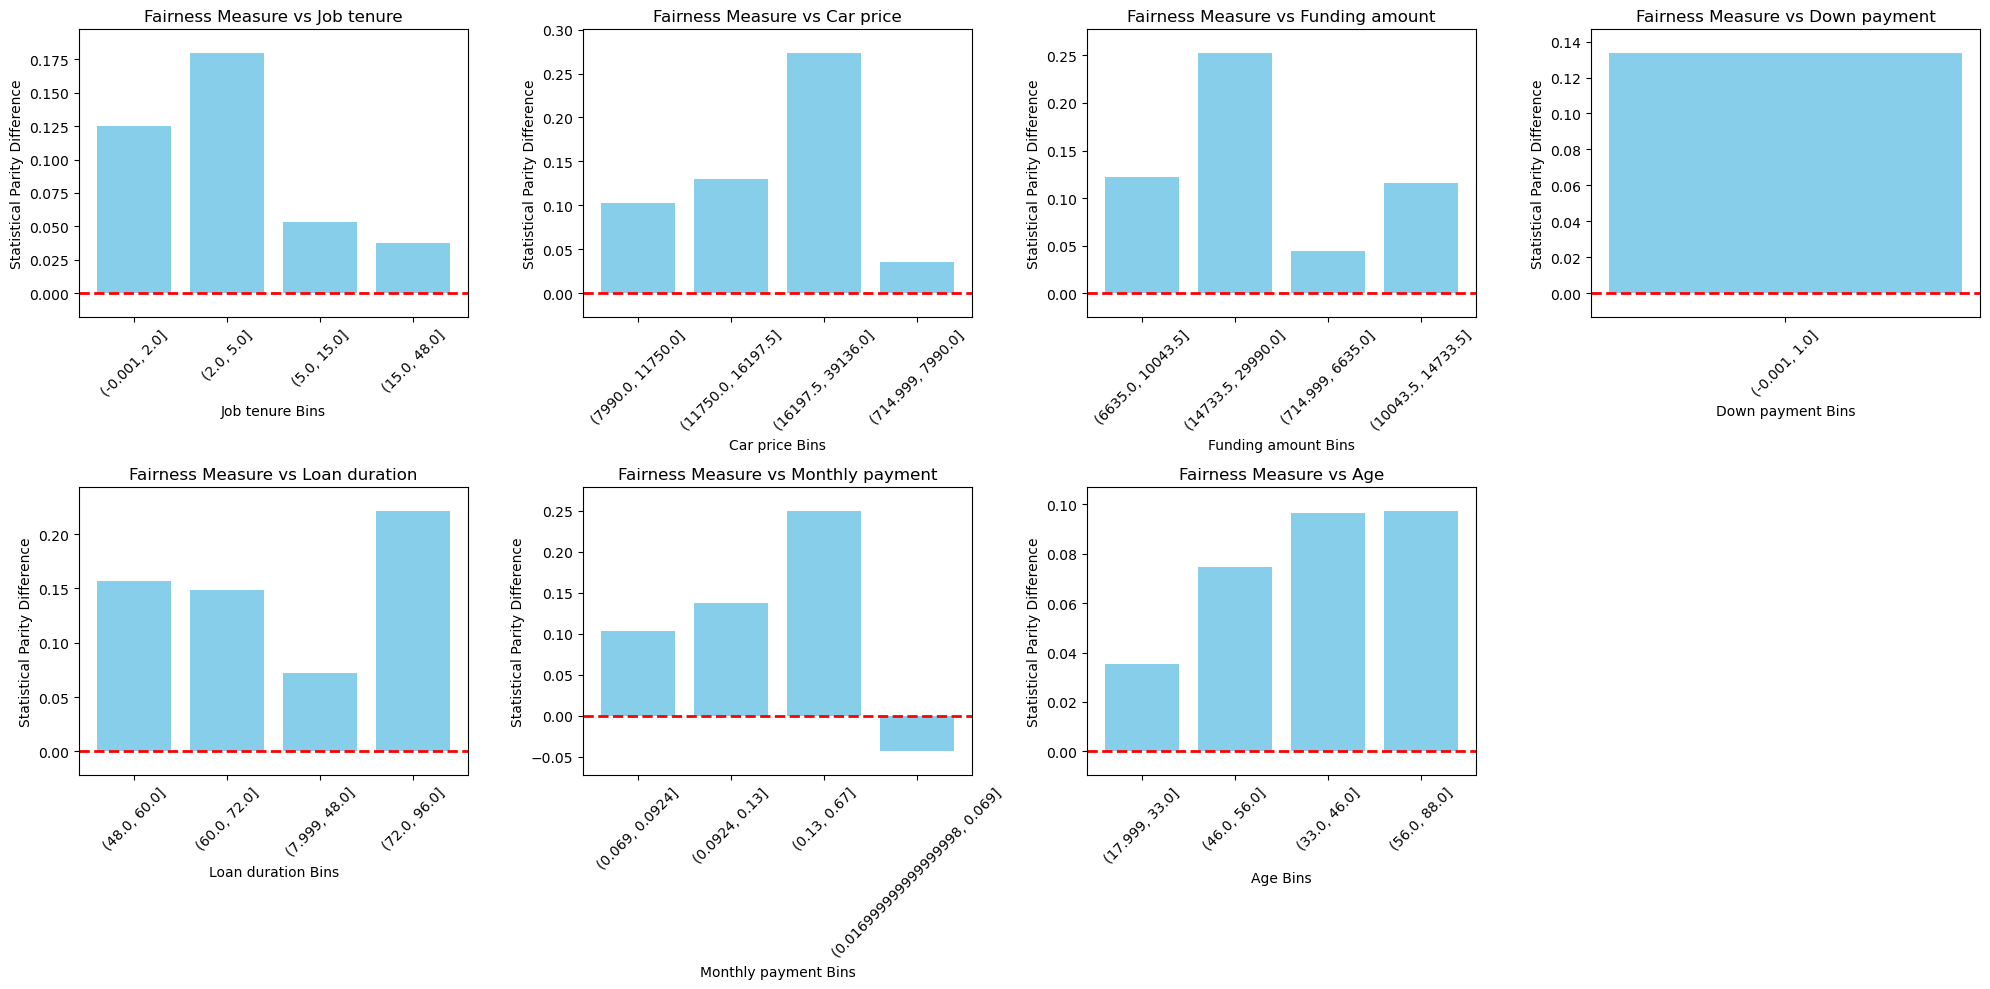

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use the entire dataset
# df = pd.read_csv('your_dataset.csv')  # Load your dataset

# For demonstration, let's assume 'Married' is the protected attribute
protected_attribute = 'Married'
target = 'True_Label'

# List of continuous features to bin
continuous_features = ['Job tenure', 'Car price', 'Funding amount', 'Down payment', 'Loan duration', 'Monthly payment', 'Age']

# Number of bins
num_bins = 4

# Initialize figure for subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

# Loop through each feature and plot the fairness measure
for i, feature in enumerate(continuous_features):
    # Bin the feature
    df[f'{feature}_bins'] = pd.qcut(df[feature], q=num_bins, duplicates='drop')
    
    # Initialize list to store fairness measures
    fairness_measures = []
    bin_labels = []
    
    # Calculate fairness measure for each bin
    for bin_category in df[f'{feature}_bins'].unique():
        bin_data = df[df[f'{feature}_bins'] == bin_category]
        
        # Group by protected attribute and calculate positive outcome rates
        group_rates = bin_data.groupby(protected_attribute)[target].mean()
        
        # Ensure both groups are present
        if len(group_rates) == 2:
            # Calculate statistical parity difference
            parity_diff = group_rates.iloc[0] - group_rates.iloc[1]
            fairness_measures.append(parity_diff)
            bin_labels.append(str(bin_category))
        else:
            # If a group is missing, append NaN
            fairness_measures.append(np.nan)
            bin_labels.append(str(bin_category))
    
    # Plot the fairness measure
    ax = axes[i]
    ax.bar(bin_labels, fairness_measures, color='skyblue')
    ax.set_title(f'Fairness Measure vs {feature}')
    ax.set_xlabel(f'{feature} Bins')
    ax.set_ylabel('Statistical Parity Difference')
    
    # Plot the red reference line at y=0
    ax.axhline(y=0, color='red', linestyle='--', linewidth=2)
    
    # Adjust y-axis limits to make the red line visible
    max_parity_diff = max([val for val in fairness_measures if pd.notna(val)] + [0])
    min_parity_diff = min([val for val in fairness_measures if pd.notna(val)] + [0])
    y_margin = (max_parity_diff - min_parity_diff) * 0.1 if max_parity_diff != min_parity_diff else 0.1  # 10% margin or default
    
    ax.set_ylim(min_parity_diff - y_margin, max_parity_diff + y_margin)
    
    # Ensure y=0 is visible even if outside current limits
    ylim = ax.get_ylim()
    new_bottom = min(ylim[0], 0)
    new_top = max(ylim[1], 0)
    ax.set_ylim(new_bottom, new_top)
    
    # Move the x-axis to the bottom of the plot to avoid overlapping with the red line
    ax.spines['bottom'].set_position(('data', new_bottom))
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Remove any empty subplots if features are less than subplots
if len(continuous_features) < len(axes):
    for j in range(len(continuous_features), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


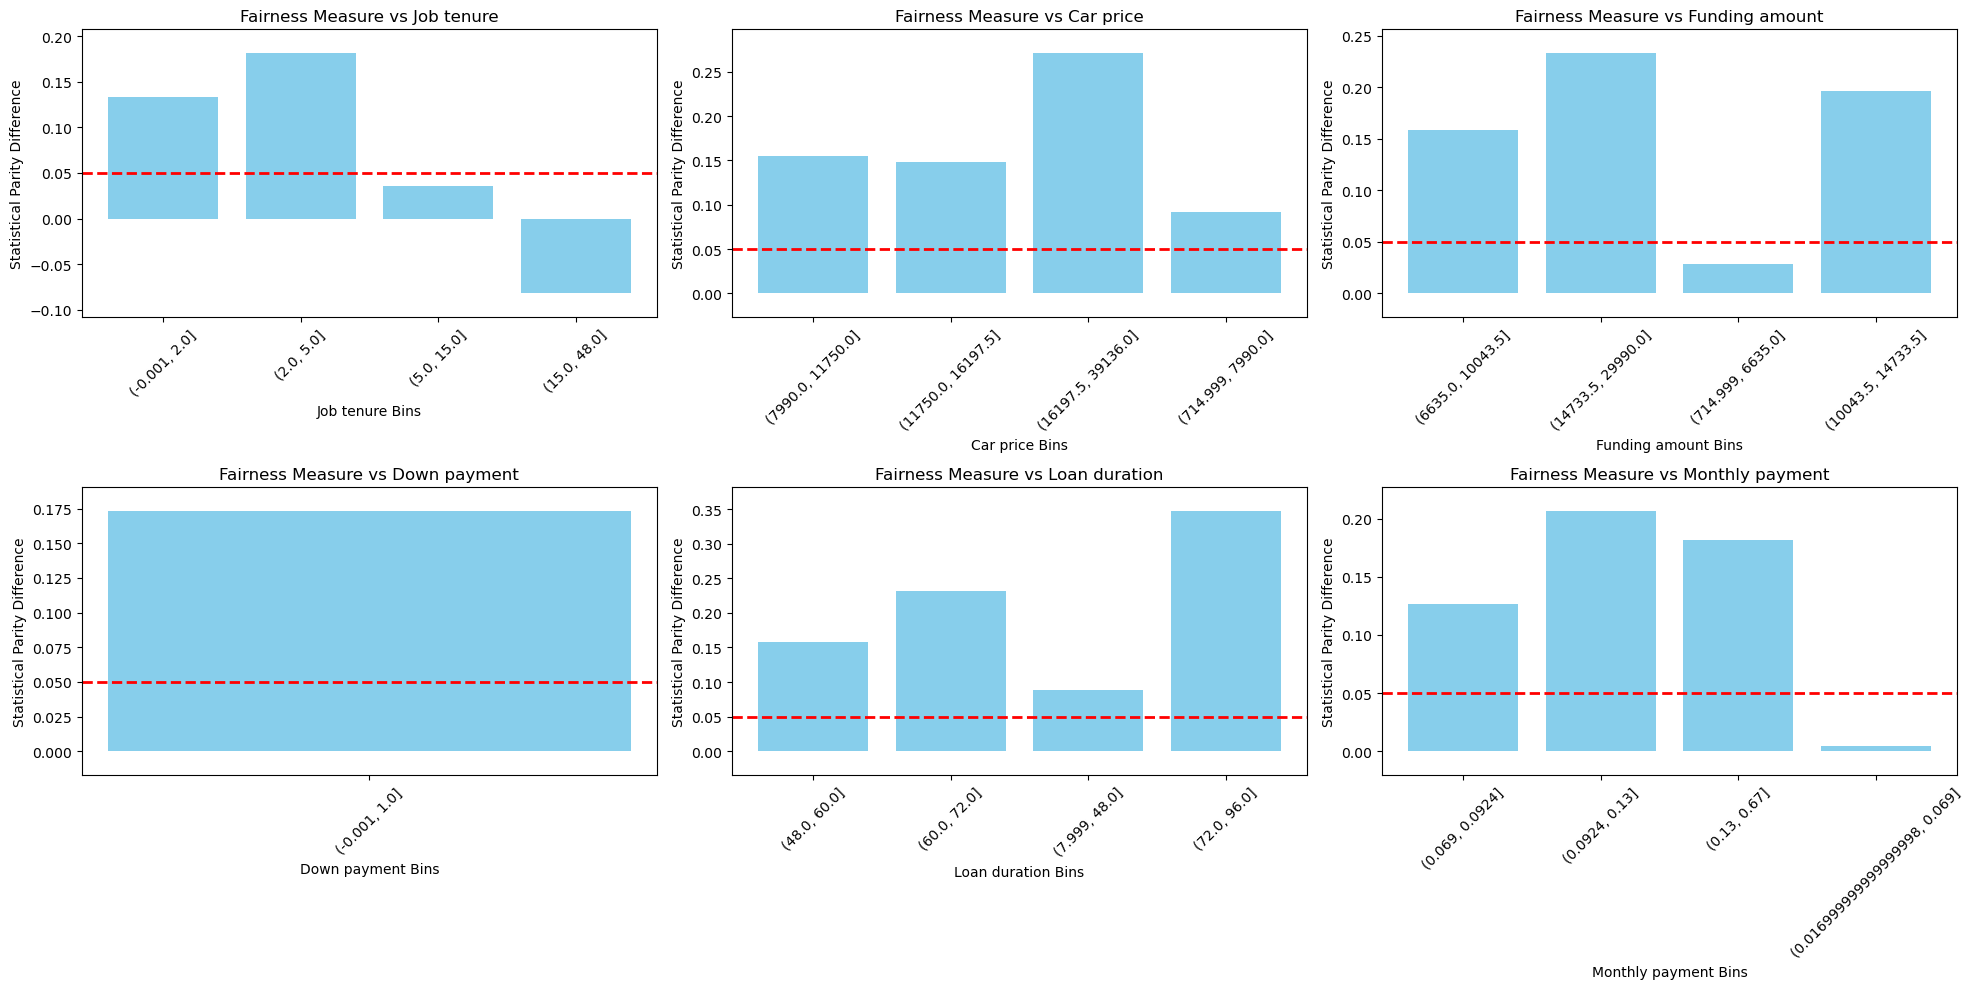

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use the entire dataset
# df = pd.read_csv('your_dataset.csv')  # Load your dataset

# For demonstration, 'Age' is now the protected attribute
protected_attribute = 'Age'
target = 'True_Label'

# List of continuous features to bin
continuous_features = ['Job tenure', 'Car price', 'Funding amount', 'Down payment', 'Loan duration', 'Monthly payment']

# Number of bins for Age
age_bins = 4

# Bin 'Age' into discrete categories (for example, into quartiles)
df[f'{protected_attribute}_bins'] = pd.qcut(df[protected_attribute], q=age_bins, duplicates='drop')

# Number of bins for other continuous features
num_bins = 4

# Initialize figure for subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()

# Loop through each feature and plot the fairness measure
for i, feature in enumerate(continuous_features):
    # Bin the feature
    df[f'{feature}_bins'] = pd.qcut(df[feature], q=num_bins, duplicates='drop')
    
    # Initialize list to store fairness measures
    fairness_measures = []
    bin_labels = []
    
    # Calculate fairness measure for each bin of the feature
    for bin_category in df[f'{feature}_bins'].unique():
        bin_data = df[df[f'{feature}_bins'] == bin_category]
        
        # Group by the binned protected attribute and calculate positive outcome rates
        group_rates = bin_data.groupby(f'{protected_attribute}_bins')[target].mean()
        
        # Ensure there are at least two groups for comparison
        if len(group_rates) >= 2:
            # Calculate statistical parity difference (difference between first two groups)
            parity_diff = group_rates.iloc[0] - group_rates.iloc[1]
            fairness_measures.append(parity_diff)
            bin_labels.append(str(bin_category))
        else:
            # If a group is missing, append NaN
            fairness_measures.append(np.nan)
            bin_labels.append(str(bin_category))
    
    # Plot the fairness measure
    ax = axes[i]
    ax.bar(bin_labels, fairness_measures, color='skyblue')
    ax.set_title(f'Fairness Measure vs {feature}')
    ax.set_xlabel(f'{feature} Bins')
    ax.set_ylabel('Statistical Parity Difference')
    
    # Plot the red reference line at y=0
    ax.axhline(y=0.05, color='red', linestyle='--', linewidth=2)
    
    # Adjust y-axis limits to make the red line visible
    max_parity_diff = max([val for val in fairness_measures if pd.notna(val)] + [0])
    min_parity_diff = min([val for val in fairness_measures if pd.notna(val)] + [0])
    y_margin = (max_parity_diff - min_parity_diff) * 0.1 if max_parity_diff != min_parity_diff else 0.1  # 10% margin or default
    
    ax.set_ylim(min_parity_diff - y_margin, max_parity_diff + y_margin)
    
    # Ensure y=0 is visible even if outside current limits
    ylim = ax.get_ylim()
    new_bottom = min(ylim[0], 0)
    new_top = max(ylim[1], 0)
    ax.set_ylim(new_bottom, new_top)
    
    # Move the x-axis to the bottom of the plot to avoid overlapping with the red line
    ax.spines['bottom'].set_position(('data', new_bottom))
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Remove any empty subplots if the number of features is less than subplots
if len(continuous_features) < len(axes):
    for j in range(len(continuous_features), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


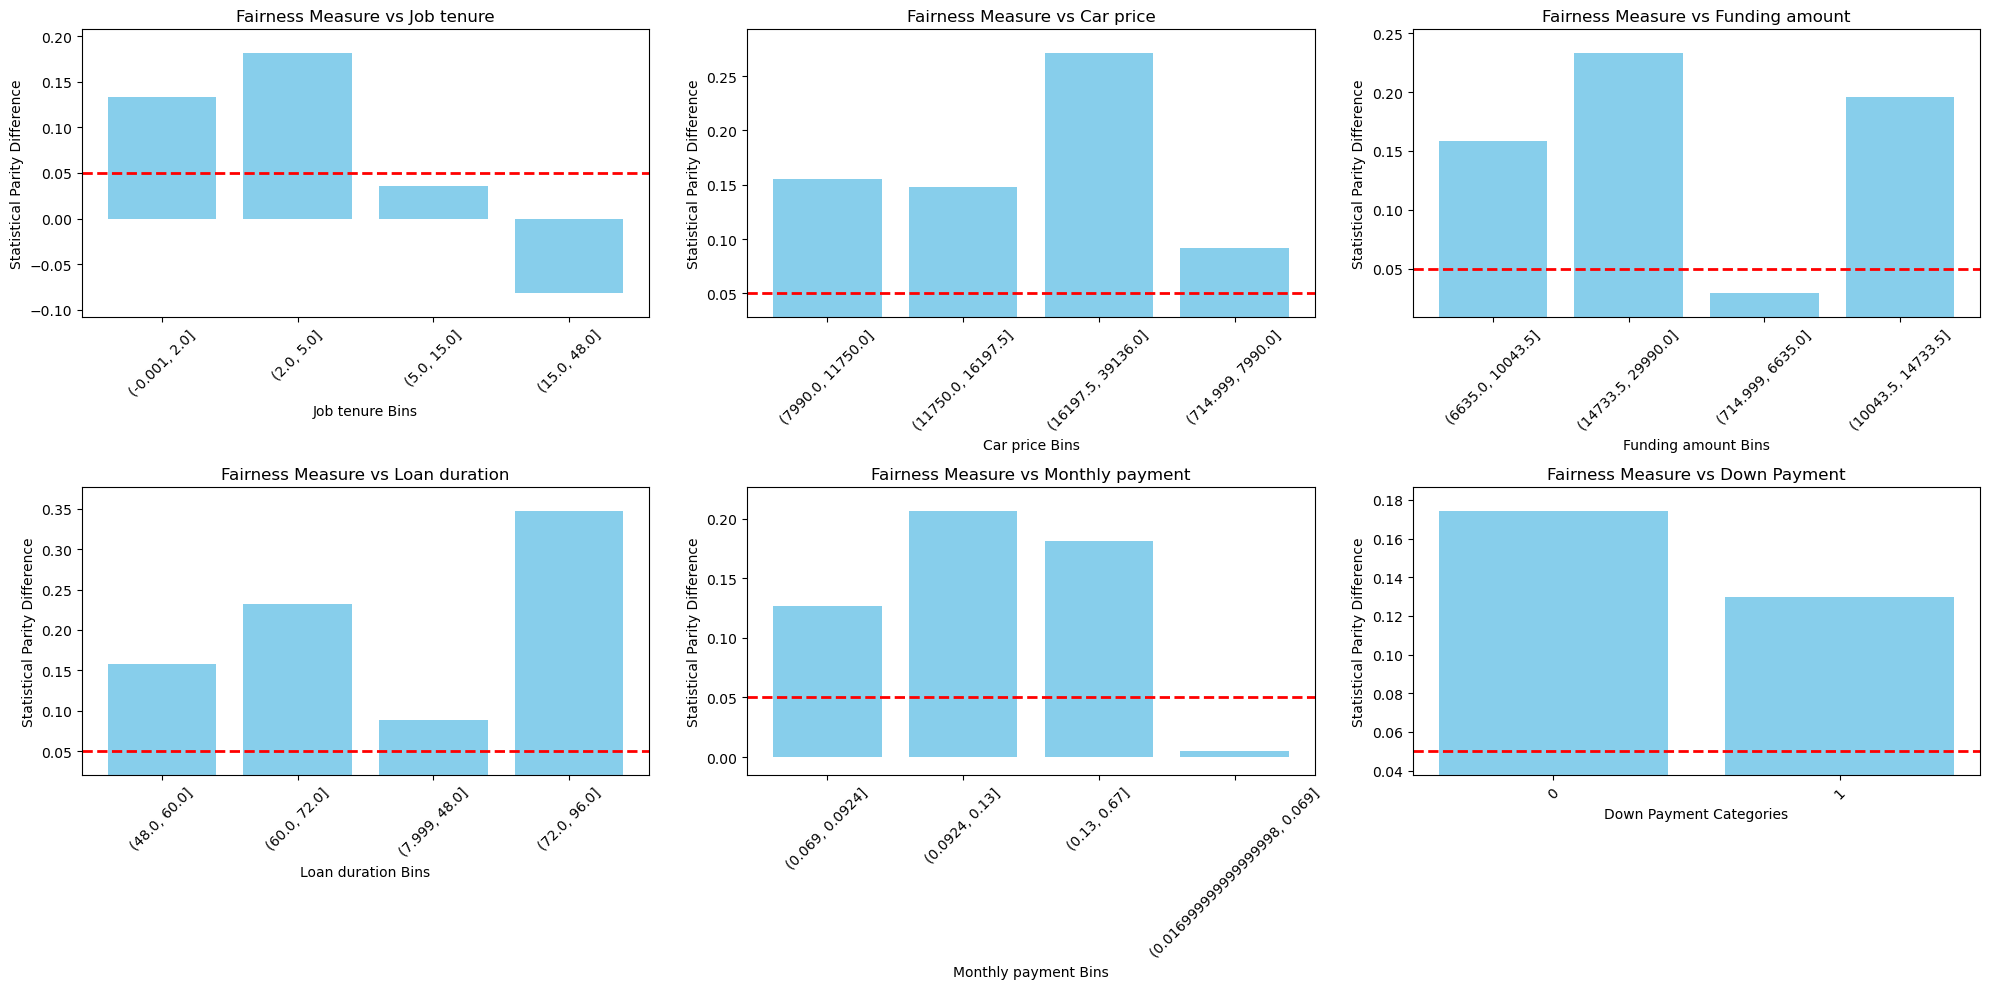

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use the entire dataset
# df = pd.read_csv('your_dataset.csv')  # Load your dataset

# For demonstration, 'Age' is now the protected attribute
protected_attribute = 'Age'
target = 'True_Label'

# List of continuous features to bin
continuous_features = ['Job tenure', 'Car price', 'Funding amount', 'Loan duration', 'Monthly payment']

# Categorical feature
categorical_feature = 'Down payment'

# Number of bins for Age
age_bins = 4

# Bin 'Age' into discrete categories (for example, into quartiles)
df[f'{protected_attribute}_bins'] = pd.qcut(df[protected_attribute], q=age_bins, duplicates='drop')

# Number of bins for other continuous features
num_bins = 4

# Initialize figure for subplots (2 rows: 3 continuous features and 1 categorical feature)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()

# Loop through each continuous feature and plot the fairness measure
for i, feature in enumerate(continuous_features):
    # Bin the feature
    df[f'{feature}_bins'] = pd.qcut(df[feature], q=num_bins, duplicates='drop')
    
    # Initialize list to store fairness measures
    fairness_measures = []
    bin_labels = []
    
    # Calculate fairness measure for each bin of the feature
    for bin_category in df[f'{feature}_bins'].unique():
        bin_data = df[df[f'{feature}_bins'] == bin_category]
        
        # Group by the binned protected attribute and calculate positive outcome rates
        group_rates = bin_data.groupby(f'{protected_attribute}_bins')[target].mean()
        
        # Ensure there are at least two groups for comparison
        if len(group_rates) >= 2:
            # Calculate statistical parity difference (difference between first two groups)
            parity_diff = group_rates.iloc[0] - group_rates.iloc[1]
            fairness_measures.append(parity_diff)
            bin_labels.append(str(bin_category))
        else:
            # If a group is missing, append NaN
            fairness_measures.append(np.nan)
            bin_labels.append(str(bin_category))
    
    # Plot the fairness measure
    ax = axes[i]
    ax.bar(bin_labels, fairness_measures, color='skyblue')
    ax.set_title(f'Fairness Measure vs {feature}')
    ax.set_xlabel(f'{feature} Bins')
    ax.set_ylabel('Statistical Parity Difference')
    
    # Plot the red reference line at y=0.05
    ax.axhline(y=0.05, color='red', linestyle='--', linewidth=2)
    
    # Adjust y-axis limits to make the red line visible
    max_parity_diff = max([val for val in fairness_measures if pd.notna(val)] + [0.05])
    min_parity_diff = min([val for val in fairness_measures if pd.notna(val)] + [0.05])
    y_margin = (max_parity_diff - min_parity_diff) * 0.1 if max_parity_diff != min_parity_diff else 0.1  # 10% margin or default
    
    ax.set_ylim(min_parity_diff - y_margin, max_parity_diff + y_margin)
    
    # Ensure y=0.05 is visible even if outside current limits
    ylim = ax.get_ylim()
    new_bottom = min(ylim[0], 0.05)
    new_top = max(ylim[1], 0.05)
    ax.set_ylim(new_bottom, new_top)
    
    # Move the x-axis to the bottom of the plot to avoid overlapping with the red line
    ax.spines['bottom'].set_position(('data', new_bottom))
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Handle the categorical 'Down payment' feature
# Initialize list to store fairness measures for the categorical feature
fairness_measures = []
bin_labels = []

# Group by the protected attribute and 'Down payment' directly
for category in df[categorical_feature].unique():
    category_data = df[df[categorical_feature] == category]
    
    # Group by the protected attribute (Age bins) and calculate positive outcome rates
    group_rates = category_data.groupby(f'{protected_attribute}_bins')[target].mean()
    
    # Ensure there are at least two groups for comparison
    if len(group_rates) >= 2:
        # Calculate statistical parity difference (difference between first two groups)
        parity_diff = group_rates.iloc[0] - group_rates.iloc[1]
        fairness_measures.append(parity_diff)
        bin_labels.append(str(category))
    else:
        # If a group is missing, append NaN
        fairness_measures.append(np.nan)
        bin_labels.append(str(category))

# Plot the fairness measure for 'Down payment'
ax = axes[len(continuous_features)]  # Use the next available subplot
ax.bar(bin_labels, fairness_measures, color='skyblue')
ax.set_title('Fairness Measure vs Down Payment')
ax.set_xlabel('Down Payment Categories')
ax.set_ylabel('Statistical Parity Difference')

# Plot the red reference line at y=0.05
ax.axhline(y=0.05, color='red', linestyle='--', linewidth=2)

# Adjust y-axis limits to make the red line visible
max_parity_diff = max([val for val in fairness_measures if pd.notna(val)] + [0.05])
min_parity_diff = min([val for val in fairness_measures if pd.notna(val)] + [0.05])
y_margin = (max_parity_diff - min_parity_diff) * 0.1 if max_parity_diff != min_parity_diff else 0.1  # 10% margin or default

ax.set_ylim(min_parity_diff - y_margin, max_parity_diff + y_margin)

# Ensure y=0.05 is visible even if outside current limits
ylim = ax.get_ylim()
new_bottom = min(ylim[0], 0.05)
new_top = max(ylim[1], 0.05)
ax.set_ylim(new_bottom, new_top)

# Rotate x-axis labels for better readability
ax.tick_params(axis='x', rotation=45)

# Remove any empty subplots if the number of features is less than subplots
if len(continuous_features) + 1 < len(axes):
    for j in range(len(continuous_features) + 1, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


---
---
---

<Axes: >

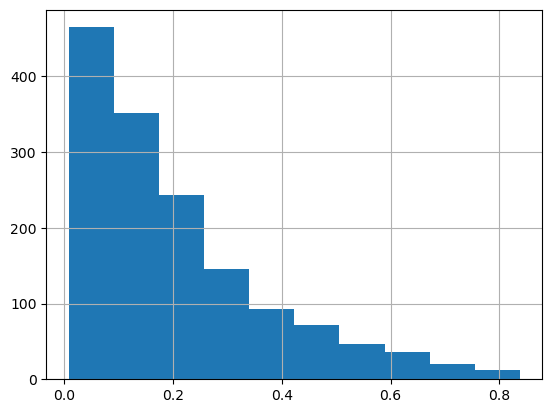

In [77]:
df['Predicted_PD'].hist()

In [82]:
df["Predicted_Positive"].value_counts()

False    1369
True      117
Name: Predicted_Positive, dtype: int64

In [79]:
df["Predicted_Positive"] = df["Predicted_PD"] > 0.5

grouped_table = pd.crosstab(
    index=df["Group"], columns=df["Predicted_Positive"], margins=False
)
grouped_table["Total"] = grouped_table.sum(axis=1)

In [80]:
# Statistical Parity Test
chi2_stat_parity, p_value_parity, dof_parity, expected_parity = chi2_contingency(
    grouped_table
)

print("Statistical Parity Table:")
print(grouped_table)
print(
    f"\nChi-squared Statistic: {chi2_stat_parity:.4f}, p-value: {p_value_parity:.4f}\n"
)

Statistical Parity Table:
Predicted_Positive  False  True  Total
Group                                 
0                     917   117   1034
1                     452     0    452

Chi-squared Statistic: 55.5161, p-value: 0.0000



In [81]:
# Conditional Statistical Parity (including True_Label)
cond_table = pd.crosstab(
    index=[df["Group"], df["True_Label"]],
    columns=df["Predicted_Positive"],
    margins=False,
)
cond_table["Total"] = cond_table.sum(axis=1)

# Conditional Statistical Parity Test
chi2_cond_parity, p_value_cond_parity, dof_cond_parity, expected_cond_parity = (
    chi2_contingency(cond_table)
)

print("Conditional Statistical Parity Table:")
print(cond_table)
print(
    f"\nConditional Chi-squared Statistic: {chi2_cond_parity:.4f}, p-value: {p_value_cond_parity:.4f}\n"
)

Conditional Statistical Parity Table:
Predicted_Positive  False  True  Total
Group True_Label                      
0     0               737    50    787
      1               180    67    247
1     0               418     0    418
      1                34     0     34

Conditional Chi-squared Statistic: 167.3484, p-value: 0.0000



In [55]:
print("Grouped Table for Statistical Parity:")
print(grouped_table)

Grouped Table for Statistical Parity:
Predicted_Positive  False  True  Total
Group                                 
0                    1378   176   1554
1                     675     0    675


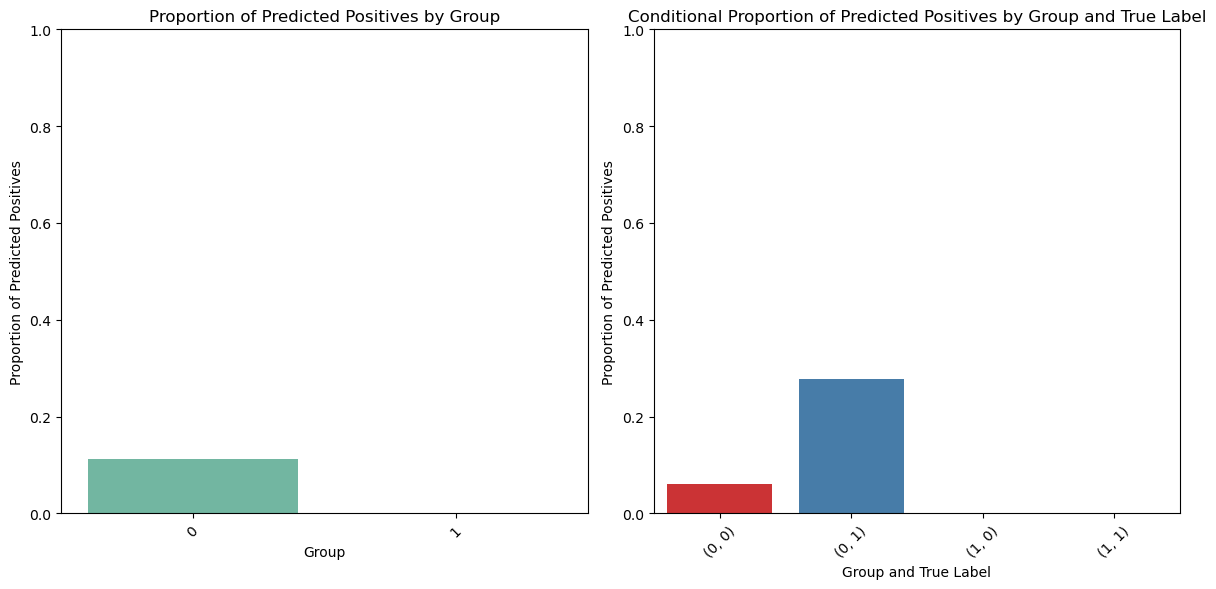

In [56]:
plt.figure(figsize=(12, 6))

# Bar plot for Statistical Parity
plt.subplot(1, 2, 1)
sns.barplot(
    x=grouped_table.index.map(str),
    y=grouped_table[True] / grouped_table["Total"],
    palette="Set2",
)
plt.title("Proportion of Predicted Positives by Group")
plt.ylabel("Proportion of Predicted Positives")
plt.xlabel("Group")
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Bar plot for Conditional Statistical Parity
plt.subplot(1, 2, 2)
sns.barplot(
    x=cond_table.index.map(str),
    y=cond_table[True] / cond_table["Total"],
    palette="Set1",
)
plt.title("Conditional Proportion of Predicted Positives by Group and True Label")
plt.ylabel("Proportion of Predicted Positives")
plt.xlabel("Group and True Label")
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

---
---
---

faire deux confusion matrix (une pour le groupe 0 et une pour le groupe 1) avec y chapeau en y et le genre en x  et puis faire un chi2 truc.

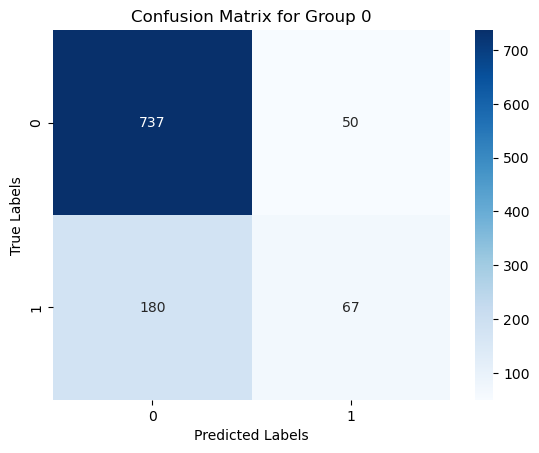

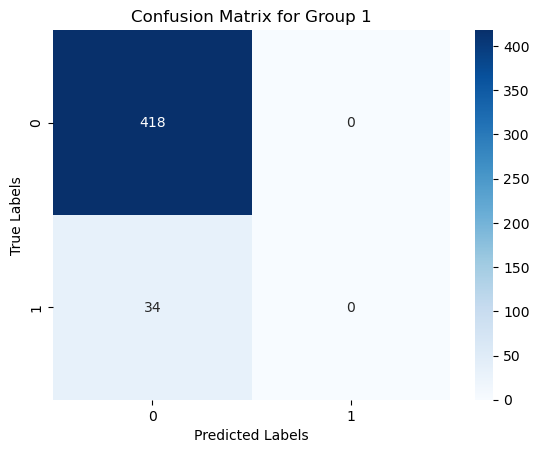

In [83]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(group, df):
    group_df = df[df['Group'] == group]
    cm = confusion_matrix(group_df['True_Label'], group_df['Predicted_Positive'])

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for Group {group}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

plot_confusion_matrix(0, df)
plot_confusion_matrix(1, df)

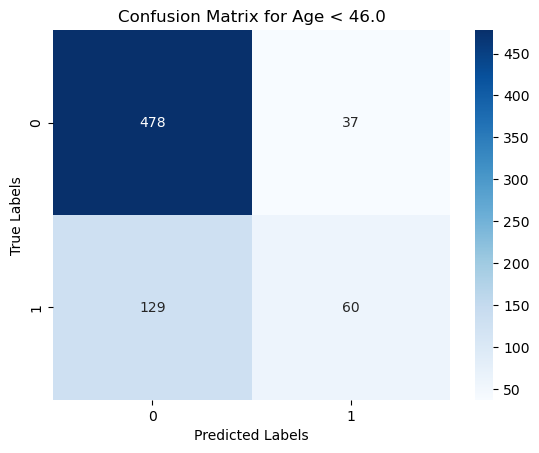

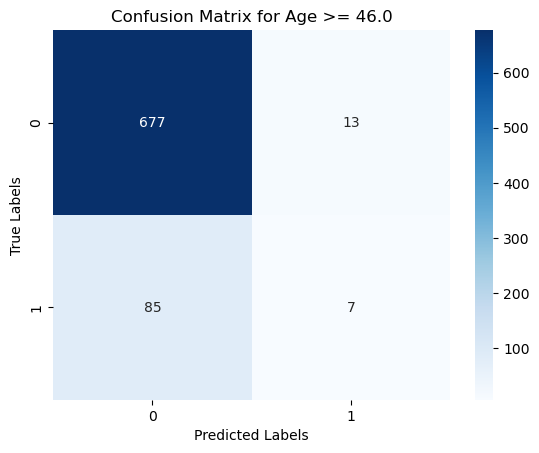

In [88]:
def plot_confusion_matrix(group_df, title):
    cm = confusion_matrix(group_df['True_Label'], group_df['Predicted_Positive'])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

age_threshold = df['Age'].quantile(0.50)
df_age_low = df[df['Age'] < age_threshold]
df_age_high = df[df['Age'] >= age_threshold]

plot_confusion_matrix(df_age_low, f'Confusion Matrix for Age < {age_threshold}')
plot_confusion_matrix(df_age_high, f'Confusion Matrix for Age >= {age_threshold}')


In [58]:
positive_predictions = pd.crosstab(df['Predicted_Positive'], df['Group'])

chi2, p, dof, ex = chi2_contingency(positive_predictions)
print(f"Chi-squared test for statistical parity: p-value = {p}")

positive_conditional_true_label = pd.crosstab([df['Predicted_Positive'], df['True_Label']], df['Group'])

chi2_conditional_true_label, p_conditional_true_label, dof_conditional_true_label, ex_conditional_true_label = chi2_contingency(positive_conditional_true_label)
print(f"Chi-squared test for conditional statistical parity with True_Label: p-value = {p_conditional_true_label}")


Chi-squared test for statistical parity: p-value = 1.7960745958718896e-19
Chi-squared test for conditional statistical parity with True_Label: p-value = 2.1198237095444473e-26


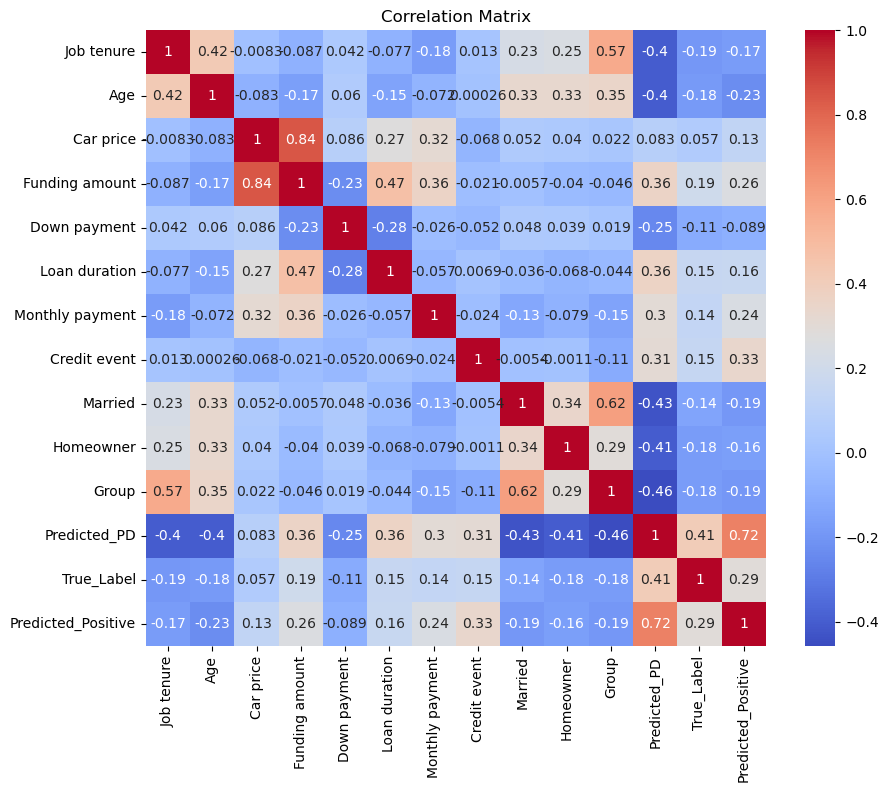

In [62]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()
